# Comparing Admin Median Salaries over Time in the USG


+ In this notebook, an administrator is anyone with one of the words "DEAN AD", "PROVOST", " ACADEMIC AFFAIR" or "PRESIDENT"
    + Does this include "Vice President", "Assistant Dean" or "Associate Dean"?  Yes.  
    
+ To examine the impact of adding those deans and associate or assistant deans, we also split them off and looked at them separately.  

+ The Salary variable, which is the main numeric variable being analyzed, includes all income.  That includes pay for overloads and summer teaching.  Travel is NOT included, that is actually a separate variable.  

## Data Sources

We downloaded the data from the [Open Georgia website](https://open.ga.gov/openga/salaryTravel/index/salaryTravelForm) for the years 2019 to 2024.  
The enrollment data for 2024 was taken from a pdf found at [(University System of Georgia, 2024)](https://www.usg.edu/research/assets/research/documents/enrollment_reports/Fall_2024_SER.pdf).  
The enrollment data for 2019 to '24 was taken from a pdf found at [(University System of Georgia, 2023)](https://www.usg.edu/research/assets/research/documents/enrollment_reports/Fall_2023_SER_Brief_withcover_updated.pdf). 

## Analysis Section

In [1]:
# import some modules that speed up this process

import numpy as np
from datascience import *
import scipy.stats as stats
import gc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
enrollment = Table.read_table("Enrollment2024.csv")
enrollment = enrollment.select("Inst_cap", "Total Enrollment").relabel(0,"Organization")

def comma_remove(x):
    return int(x.replace(",",""))

enrollment= enrollment.with_column("Total Enrollment",enrollment.apply(comma_remove, "Total Enrollment"))

old_enrollment = Table.read_table("historyofenrollment.csv")

In [3]:
### Uncomment the lines below to see the data tables

#enrollment

#old_enrollment.column("2023")

#old_enrollment.column("Organization")

In [4]:
def identity(x):
    """returns the array it receives, but sorted
        useful in .group
    """
    return np.sort(x)

def fix_gcsu(x):
    """In these data Georgia College and State University appears
        two ways; with AND and with &.  This unifies those two representations
    """
    if x == "GEORGIA COLLEGE & STATE UNIVERSITY":
        return "GEORGIA COLLEGE AND STATE UNIVERSITY"
    else:
        return x


In [5]:
ga24 = Table.read_table("Salary2024.csv")


admin24 = ga24.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

admin24 = admin24.join("Organization", enrollment)

deans24 = admin24.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean24 = admin24.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median24 = admin24.select("Organization", "Salary").group("Organization", np.median)

total24 = mean24.join("Organization", median24).relabel("Salary mean", "Mean Salary").relabel("Salary median", "Median Salary")

total24.show(3)

deans24.drop("Name").show(3)

del ga24, mean24, median24

gc.collect();

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,142081,2024,126000
ALBANY STATE UNIVERSITY,142607,2024,153000
ATLANTA METROPOLITAN STATE COLLEGE,138363,2024,145012


Title,Organization,Salary,Year
DEAN AD,ALBANY STATE UNIVERSITY,173500,2024
DEAN AD,ALBANY STATE UNIVERSITY,90000,2024
DEAN AD,ALBANY STATE UNIVERSITY,155500,2024


In [6]:
ga23 = Table.read_table("Salary2023.csv")

admin23 = ga23.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

year = "2023"

admin23 = admin23.join("Organization", old_enrollment.select("Organization", year).relabel(year, "Total Enrollment"))

deans23 = admin23.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean23 = admin23.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median23 = admin23.select("Organization", "Salary").group("Organization", np.median)

total23 = mean23.join("Organization", median23).relabel("Salary mean", "Mean Salary").relabel("Salary median", "Median Salary")

total23.show(3)

del ga23, mean23, median23

gc.collect();

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,112146,2023,114433
ALBANY STATE UNIVERSITY,133383,2023,135610
ATLANTA METROPOLITAN STATE COLLEGE,156461,2023,165000


In [7]:
ga22 = Table.read_table("Salary2022.csv")

admin22 = ga22.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

admin22 = admin22.with_column("Organization", admin22.apply(fix_gcsu, "Organization"))

year = "2022"

admin22 = admin22.join("Organization", old_enrollment.select("Organization", year).relabel(year, "Total Enrollment"))

deans22 = admin22.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean22 = admin22.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median22 = admin22.select("Organization", "Salary").group("Organization", np.median)

total22 = mean22.join("Organization", median22).relabel("Salary mean", "Mean Salary").relabel("Salary median", "Median Salary")

total22.show(3)

del ga22, mean22, median22

gc.collect();

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,136899,2022,109520
ALBANY STATE UNIVERSITY,137280,2022,150100
ATLANTA METROPOLITAN STATE COLLEGE,234215,2022,234215


In [8]:
ga21 = Table.read_table("Salary2021.csv")

admin21 = ga21.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

admin21 = admin21.with_column("Organization", admin21.apply(fix_gcsu, "Organization"))

year = "2021"

admin21 = admin21.join("Organization", old_enrollment.select("Organization", year).relabel(year, "Total Enrollment"))

deans21 = admin21.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean21 = admin21.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median21 = admin21.select("Organization", "Salary", "Year").group("Organization", np.median).relabel("Year median", "Year")

total21 = mean21.join("Organization", median21).relabel("Salary mean", "Mean Salary").relabel("Salary median", "Median Salary")

del ga21, mean21, median21

gc.collect();

In [9]:
ga20 = Table.read_table("Salary2020.csv")

admin20 = ga20.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

admin20 = admin20.with_column("Organization", admin20.apply(fix_gcsu, "Organization"))

year = "2020"

admin20 = admin20.join("Organization", old_enrollment.select("Organization", year).relabel(year, "Total Enrollment"))

deans20 = admin20.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean20 = admin20.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median20 = admin20.select("Organization", "Salary").group("Organization", np.median)

total20 = mean20.join("Organization", median20).relabel(1, "Mean Salary").relabel(3, "Median Salary")

total20.show(3)

del ga20, mean20, median20

gc.collect();

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,147063,2020,119338
ALBANY STATE UNIVERSITY,142576,2020,150000
ATLANTA METROPOLITAN STATE COLLEGE,103723,2020,115615


In [10]:
ga19 = Table.read_table("Salary2019.csv")

admin19 = ga19.select("Name", "Title", "Organization", "Salary", "FiscalYear").where("Title",
        are.containing("PROVOST")|are.containing(" ACADEMIC AFFAIRS")|are.containing("PRESIDENT")|
        are.containing("DEAN AD")).relabel("FiscalYear", "Year")

admin19 = admin19.with_column("Organization", admin19.apply(fix_gcsu, "Organization"))

year = "2019"

admin19 = admin19.join("Organization", old_enrollment.select("Organization", year).relabel(year, "Total Enrollment"))

deans19 = admin19.select("Name", "Title", "Organization", "Salary", "Year").where("Title",
        are.equal_to("DEAN AD"))

mean19 = admin19.select("Organization", "Salary", "Year").group("Organization", np.mean).relabel("Year mean", "Year")

median19 = admin19.select("Organization", "Salary").group("Organization", np.median)

total19 = mean19.join("Organization", median19).relabel("Salary mean", "Mean Salary").relabel("Salary median", "Median Salary")

total19.show()

del ga19, mean19, median19

gc.collect();

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,138701,2019,108985
ALBANY STATE UNIVERSITY,106608,2019,98369.6
ATLANTA METROPOLITAN STATE COLLEGE,123294,2019,116865
AUGUSTA UNIVERSITY,221329,2019,193550
CLAYTON STATE UNIVERSITY,120613,2019,112546
COLLEGE OF COASTAL GEORGIA,105496,2019,99336.3
COLUMBUS STATE UNIVERSITY,147080,2019,130046
DALTON STATE COLLEGE,147055,2019,138240
EAST GEORGIA STATE COLLEGE,105394,2019,86142.3
FORT VALLEY STATE UNIVERSITY,115032,2019,96704


In [11]:
long_admin_since_2019 = total19.append(total20).append(total21).append(total22).append(total23).append(total24)

long_admin_since_2019.show(3)

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,138701,2019,108985
ALBANY STATE UNIVERSITY,106608,2019,98369.6
ATLANTA METROPOLITAN STATE COLLEGE,123294,2019,116865


In [12]:
long_admin_since_2019.num_rows

156

In [13]:
admin19to24 = admin19.append(admin20).append(admin21).append(admin22).append(admin23).append(admin24)

admin19to24 = admin19to24.with_column("Dollars per 1000 Students", 1000*admin19to24.column("Salary")/admin19to24.column("Total Enrollment") )

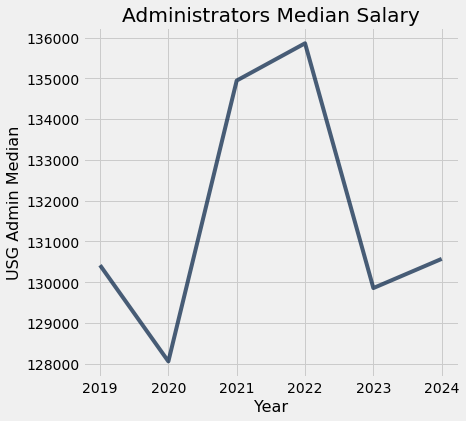

In [14]:
hold_for_plot = long_admin_since_2019.drop("Organization", "Mean Salary").group("Year", np.median).relabel("Median Salary median","USG Admin Median")

hold_for_plot.plot("Year", "USG Admin Median")
plots.title("Administrators Median Salary");

In [15]:
non_flagship = long_admin_since_2019.where("Organization", are.not_contained_in("UNIVERSITY OF GEORGIA INSTITUTE OF TECHNOLOGY"))

non_flagship

Organization,Mean Salary,Year,Median Salary
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,138701,2019,108985
ALBANY STATE UNIVERSITY,106608,2019,98369.6
ATLANTA METROPOLITAN STATE COLLEGE,123294,2019,116865
AUGUSTA UNIVERSITY,221329,2019,193550
CLAYTON STATE UNIVERSITY,120613,2019,112546
COLLEGE OF COASTAL GEORGIA,105496,2019,99336.3
COLUMBUS STATE UNIVERSITY,147080,2019,130046
DALTON STATE COLLEGE,147055,2019,138240
EAST GEORGIA STATE COLLEGE,105394,2019,86142.3
FORT VALLEY STATE UNIVERSITY,115032,2019,96704


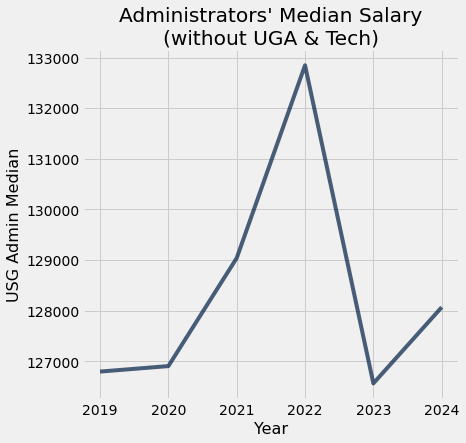

In [16]:
hold_for_plot = non_flagship.drop("Organization", "Mean Salary", "Name", "Title").group("Year", np.median).relabel(1,"USG Admin Median")
hold_for_plot.plot("Year", "USG Admin Median")
plots.title("Administrators' Median Salary\n(without UGA & Tech)");

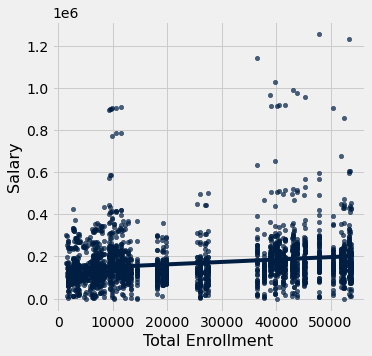

In [17]:
admin19to24.where("Salary", are.below(1.5e6)).scatter("Total Enrollment", "Salary", fit_line=True)

In [18]:
stats.linregress(admin19to24.where("Salary", are.below(1.5e6)).column("Total Enrollment"), admin19to24.where("Salary", are.below(1.5e6)).column("Salary"))

LinregressResult(slope=1.1485982100344077, intercept=139020.9921540467, rvalue=0.18714880011801927, pvalue=1.3789518186757208e-22, stderr=0.11639353443868515)

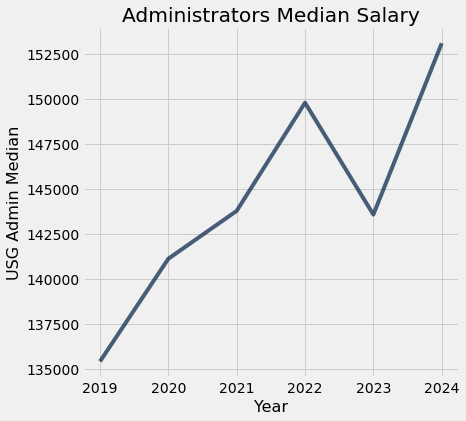

In [19]:
hold_for_plot = admin19to24.select("Year", "Salary").group("Year", np.median).relabel(1,"USG Admin Median")

hold_for_plot.plot("Year")
plots.title("Administrators Median Salary");

In [20]:
# Remove UGA and GA Tech
non_flagship = admin19to24.where("Organization", are.not_contained_in("UNIVERSITY OF GEORGIA INSTITUTE OF TECHNOLOGY"))
non_flagship.set_format("Salary", CurrencyFormatter).drop("Name")

Organization,Title,Salary,Year,Total Enrollment,Dollars per 1000 Students
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,ASSOC/ASST VICE PRESIDENT,"$104,520.00",2019,3927,26615.7
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,ASSISTANT VICE PRESIDENT,"$113,449.98",2019,3927,28889.7
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,PRESIDENT,"$273,364.62",2019,3927,69611.6
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,CHIEF ACADEMIC AFFAIRS OFFICER,"$152,450.00",2019,3927,38821
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,ASSOC/ASST VICE PRESIDENT,"$103,400.00",2019,3927,26330.5
ABRAHAM BALDWIN AGRICULTURAL COLLEGE,DEAN AD,"$85,021.62",2019,3927,21650.5
ALBANY STATE UNIVERSITY,INTERIM VICE PRESIDENT,"$22,037.33",2019,6122,3599.69
ALBANY STATE UNIVERSITY,VICE PRESIDENT,"$18,311.59",2019,6122,2991.11
ALBANY STATE UNIVERSITY,ASSOC/ASST DEAN AD,"$53,316.14",2019,6122,8708.94
ALBANY STATE UNIVERSITY,PRESIDENT,"$258,944.20",2019,6122,42297.3


In [21]:
admin19to24.pivot("Year", "Organization").sort("2024", True)

Organization,2019,2020,2021,2022,2023,2024
GEORGIA STATE UNIVERSITY,51,52,47,48,50,58
GEORGIA INSTITUTE OF TECHNOLOGY,40,42,38,41,42,55
UNIVERSITY OF NORTH GEORGIA,33,34,35,38,39,41
KENNESAW STATE UNIVERSITY,41,37,31,34,37,39
UNIVERSITY OF GEORGIA,36,40,41,41,39,39
AUGUSTA UNIVERSITY,36,38,39,40,40,38
GEORGIA SOUTHERN UNIVERSITY,23,30,23,27,34,35
UNIVERSITY OF WEST GEORGIA,20,19,17,17,18,23
GEORGIA GWINNETT COLLEGE,11,12,12,12,15,18
ALBANY STATE UNIVERSITY,14,13,14,16,19,17


In [22]:


keep = admin19to24.pivot("Year", "Organization")

median_of_other_usg = make_array(np.median(keep.column(1)),
                                np.median(keep.column(2)),
                                np.median(keep.column(3)),
                                np.median(keep.column(4)),
                                np.median(keep.column(5)),
                                np.median(keep.column(6))
                               )

max_of_other_usg = make_array(max(keep.column(1)),
                                 max(keep.column(2)),
                                 max(keep.column(3)),
                                 max(keep.column(4)),
                                 max(keep.column(5)),
                                 max(keep.column(6))
                                )

mean_of_other_usg = make_array(np.mean(keep.column(1)),
                                 np.mean(keep.column(2)),
                                 np.mean(keep.column(3)),
                                 np.mean(keep.column(4)),
                                 np.mean(keep.column(5)),
                                 np.mean(keep.column(6))
                                )


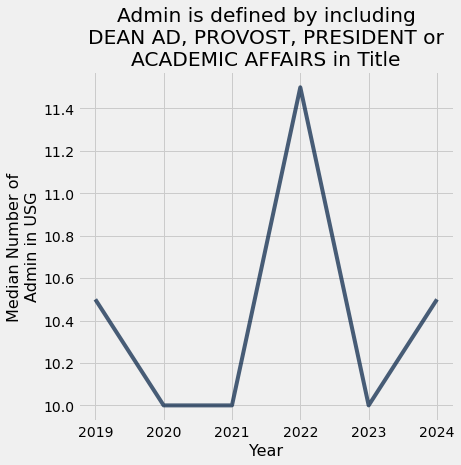

In [23]:
Table().with_columns("Year", make_array(2019,2020,2021,2022,2023,2024), 
                     "Median Number of\nAdmin in USG", median_of_other_usg
                     ).plot("Year")
plots.title("Admin is defined by including\nDEAN AD, PROVOST, PRESIDENT or\nACADEMIC AFFAIRS in Title");

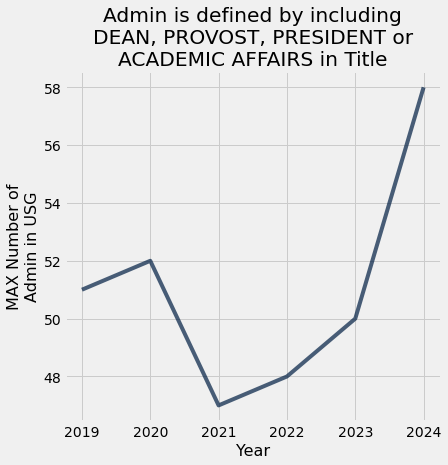

In [24]:
Table().with_columns("Year", make_array(2019,2020,2021,2022,2023,2024), 
                     "MAX Number of\nAdmin in USG", max_of_other_usg
                     ).plot("Year")
plots.title("Admin is defined by including\nDEAN, PROVOST, PRESIDENT or\nACADEMIC AFFAIRS in Title");

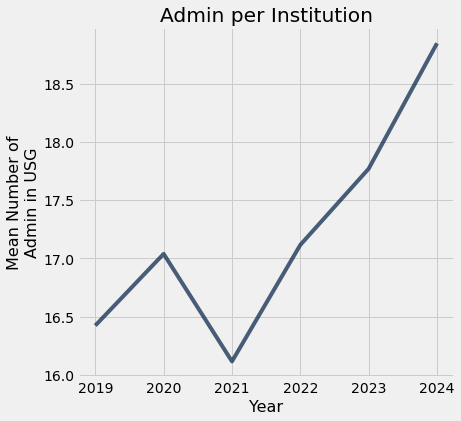

In [25]:
Table().with_columns("Year", make_array(2019,2020,2021,2022,2023,2024), 
                     "Mean Number of\nAdmin in USG", mean_of_other_usg).plot("Year")
plots.title("Admin per Institution")
plots.savefig("year_count.pdf", bbox_inches ="tight");

In [26]:
admin19to24.pivot("Year", "Organization", "Salary", sum).sort("2024", True).set_format(["2024", "2023", "2022","2021","2020","2019"], CurrencyFormatter).show()

Organization,2019,2020,2021,2022,2023,2024
GEORGIA INSTITUTE OF TECHNOLOGY,"$7,826,377.89","$8,650,329.13","$7,972,198.38","$9,476,222.72","$10,149,756.06","$13,310,088.67"
GEORGIA STATE UNIVERSITY,"$9,109,007.48","$11,316,222.80","$7,508,689.52","$9,136,356.03","$9,133,690.67","$11,513,444.49"
AUGUSTA UNIVERSITY,"$7,967,851.71","$8,148,164.92","$7,951,852.18","$8,441,061.38","$9,245,724.98","$9,379,362.24"
UNIVERSITY OF GEORGIA,"$7,332,068.72","$8,560,147.29","$8,721,707.74","$9,060,627.75","$8,130,570.77","$9,342,142.63"
KENNESAW STATE UNIVERSITY,"$5,424,867.96","$5,907,735.23","$5,153,791.99","$5,782,808.85","$6,088,788.74","$7,342,348.32"
UNIVERSITY OF NORTH GEORGIA,"$4,243,824.17","$4,617,168.59","$4,623,333.16","$4,995,800.34","$5,082,666.82","$5,347,113.26"
GEORGIA SOUTHERN UNIVERSITY,"$3,060,329.06","$4,505,835.13","$3,349,131.33","$3,976,504.49","$4,393,168.57","$4,861,332.65"
UNIVERSITY OF WEST GEORGIA,"$2,827,341.24","$2,009,056.80","$2,624,094.00","$2,814,964.34","$2,620,208.10","$3,109,234.98"
GEORGIA GWINNETT COLLEGE,"$1,396,333.16","$1,587,439.15","$1,795,188.95","$1,940,525.26","$2,108,367.36","$2,553,956.16"
ALBANY STATE UNIVERSITY,"$1,492,515.35","$1,853,484.68","$2,033,819.61","$2,196,483.05","$2,534,281.89","$2,424,310.55"


In [27]:
hold_up = admin19to24.where("Year", 2024).group("Organization").with_column("Salary median",admin19to24.group("Organization", np.median).column("Salary median")).join("Organization", enrollment)

size_medians = hold_up.column("Salary median")/500

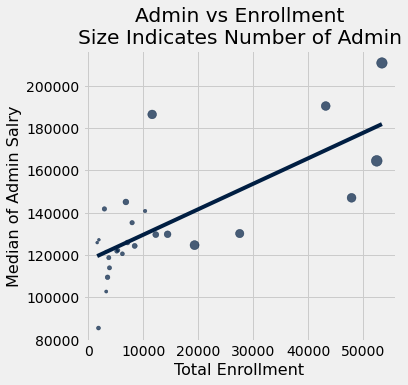

In [28]:
sizes = 2*hold_up.column("count")

hold_up.scatter("Total Enrollment", "Salary median", s = sizes, fit_line=True)
plots.ylabel("Median of Admin Salry")
plots.title("Admin vs Enrollment\nSize Indicates Number of Admin")             
plots.savefig("admin_deans_salary_enrollment.pdf", bbox_inches='tight');

In [29]:
results = stats.linregress(hold_up.column("Total Enrollment"),hold_up.column("Salary median"))

results

LinregressResult(slope=1.2046389388706287, intercept=117506.7531930927, rvalue=0.7234943600877761, pvalue=2.9587111186189484e-05, stderr=0.23462433609618613)

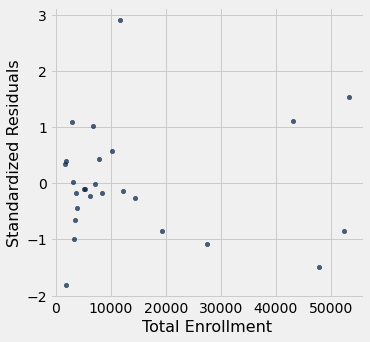

In [30]:
predictions = hold_up.column("Total Enrollment")*results[0]+results[1]

residuals = hold_up.column("Salary median")- predictions

residuals

res_std = stats.tstd(residuals)

stand_res = residuals/res_std

hold_up.with_column("Standardized Residuals", stand_res).scatter("Total Enrollment", "Standardized Residuals")

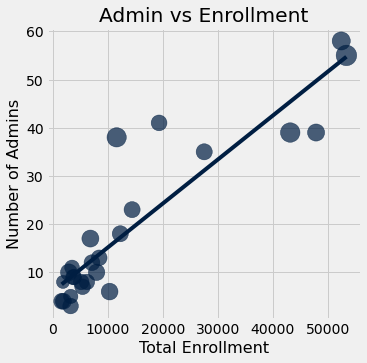

In [31]:
hold_up.scatter("Total Enrollment", "count", s = size_medians, fit_line=True)
plots.ylabel("Number of Admins")
plots.title("Admin vs Enrollment")             
plots.savefig("admin_deans_enrollment.pdf", bbox_inches='tight');

In [32]:
results = stats.linregress(hold_up.column("Total Enrollment"), hold_up.column("count"))

results

LinregressResult(slope=0.0009120355283916872, intercept=6.0522246887439195, rvalue=0.9075053584450574, pvalue=1.6030144784935378e-10, stderr=8.616841566863842e-05)

In [33]:
predictions = hold_up.column("Total Enrollment")*results[0]+results[1]

residuals = hold_up.column("count")- predictions

residuals



array([ -0.54167262,   4.7377254 ,  -3.50236118,  21.38275575,
        -3.68130797,   1.77753981,  -3.29105068,  -2.7400873 ,
         0.28239844,   1.2983121 ,  -0.52494083,   0.77990027,
        -3.96444804,   0.27882341,   3.86132607,  -0.43040429,
         4.13613681,  -3.99992352, -10.68856454,  -0.72153145,
        -5.97803466,  -3.78418016,  -6.4029096 ,  17.34731368,
         3.81993592,  -9.45075081])

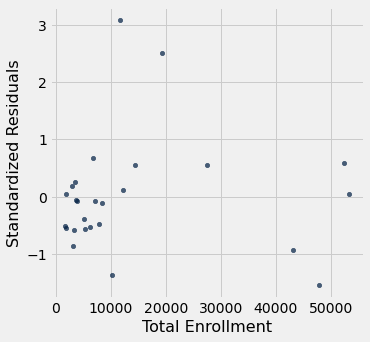

In [34]:
res_std = stats.tstd(residuals)

stand_res = residuals/res_std

hold_up.with_column("Standardized Residuals", stand_res).scatter("Total Enrollment", "Standardized Residuals")

In [35]:
np.sort(stand_res)

array([-1.53982382, -1.36150099, -0.92242066, -0.86121201, -0.57623991,
       -0.57112922, -0.54515934, -0.53033929, -0.50455972, -0.47411776,
       -0.39474447, -0.10394579, -0.07803484, -0.07562441, -0.06200522,
        0.04016806,  0.04068309,  0.11235456,  0.18703839,  0.25607724,
        0.55031041,  0.55627319,  0.59586317,  0.68252967,  2.49910142,
        3.08045823])

In [36]:
ga24 = Table.read_table("Salary2024.csv")

hold_up_deans = ga24.where("Title", are.containing("DEAN AD"))

del ga24

hold_up_deans2 = hold_up_deans.group("Organization").join("Organization",hold_up_deans.group("Organization", np.median).select("Organization", "Salary median")).join("Organization", enrollment)

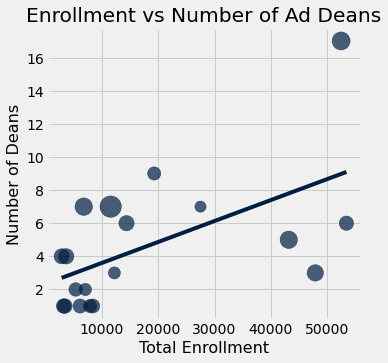

In [37]:
sizes = hold_up_deans2.column("Salary median")/500
hold_up_deans2.scatter("Total Enrollment", "count", s=sizes, fit_line=True)
plots.ylabel("Number of Deans")
plots.title("Enrollment vs Number of Ad Deans")
plots.savefig("deans_enrollment.pdf", bbox_inches="tight")

In [38]:
stats.linregress( hold_up_deans2.column("Total Enrollment"), hold_up_deans2.column("Salary median"))

LinregressResult(slope=0.4956696126683897, intercept=105544.10745968562, rvalue=0.22827807527513122, pvalue=0.3472266937537848, stderr=0.5127225298806245)

In [39]:
np.random.seed(1776)
random_label = np.random.choice(np.arange(1,27),26, replace=False);

## To remove the random label
## delete the 

## .with_column("Organization", random_label)

## from the cell(s) below

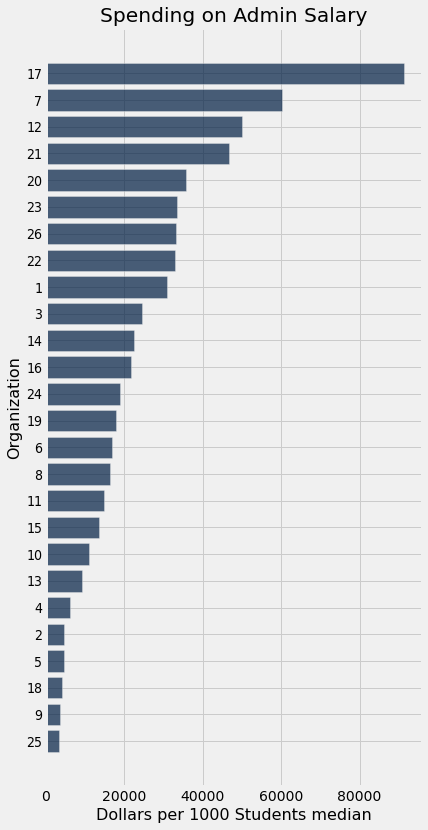

In [40]:
admin19to24.where("Year", 2024).select("Organization", "Dollars per 1000 Students").group("Organization",
                                np.median).with_column("Organization", random_label).sort(1,True).barh("Organization")
plots.title("Spending on Admin Salary");

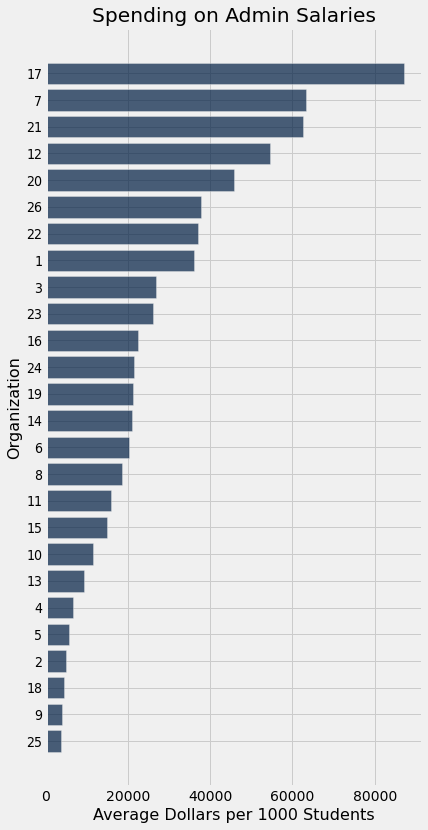

In [41]:
admin19to24.where("Year", 2024).select("Organization", "Dollars per 1000 Students").group("Organization",                                                                      
                    np.mean).with_column("Organization", random_label).sort(1,True).barh("Organization")
plots.title("Spending on Admin Salaries")
plots.xlabel("Average Dollars per 1000 Students")
plots.savefig("pareto_dollars.pdf", bbox_inches = 'tight');

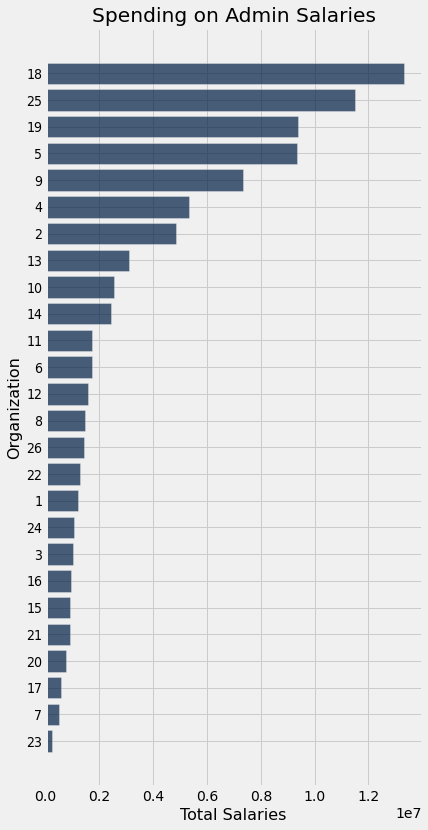

In [42]:
admin19to24.where("Year", 2024).select("Organization", "Salary").group("Organization",
            sum).with_column("Organization", random_label).sort(1,True).barh("Organization")
plots.title("Spending on Admin Salaries")
plots.xlabel("Total Salaries")
plots.savefig("pareto_total_dollars.pdf", bbox_inches = 'tight');

Is the total amount spent on Admin Salaries proportional to the institutions Total Enrollment?  To determine that, we'll run chi-squared goodness of fit test.  

In [43]:
enroll24 = admin24.group("Organization", np.mean).column("Total Enrollment mean")

usg_total_enroll = sum(enroll24)

usg_total_enroll

salary_sum24 = admin19to24.where("Year", 2024).select("Organization", "Salary").group("Organization", sum).column("Salary sum")


exp_salary_sum24 = sum(salary_sum24)*enroll24/usg_total_enroll


In [44]:
stats.chisquare(salary_sum24, exp_salary_sum24)

Power_divergenceResult(statistic=22832187.08238244, pvalue=0.0)

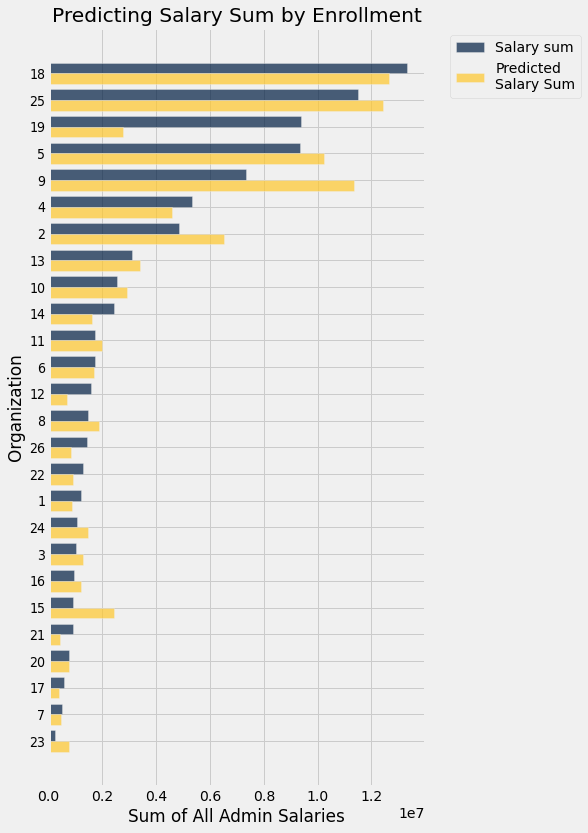

In [45]:
admin19to24.where("Year", 2024).select("Organization", "Salary").group("Organization",
            sum).with_column("Predicted\nSalary Sum", sum(salary_sum24)*enroll24/usg_total_enroll
            ).with_column("Organization", random_label).sort(1,True).barh("Organization")
plots.xlabel("Sum of All Admin Salaries")
plots.title("Predicting Salary Sum by Enrollment")
plots.savefig("pareto_total_dollars.pdf", bbox_inches = 'tight');


## References:

Open Georgia (2025)(https://open.ga.gov/openga/salaryTravel/index/salaryTravelForm)

University System of Georgia. (2023) *Fall 2023 Semester Enrollment Brief.*
https://www.usg.edu/research/assets/research/documents/enrollment_reports/Fall_2023_SER_Brief_withcover_updated.pdf


University System of Georgia. (2024) *Fall 2024 Semester Enrollment Report.* https://www.usg.edu/research/assets/research/documents/enrollment_reports/Fall_2024_SER.pdf


In [46]:
#plots.close("all");